<a href="https://colab.research.google.com/github/PigeonLore/PigeonLore/blob/main/Sales_Predictions_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo | Data Science/Stack 2: Machine Learning/Week 1: Machine Learning/DataSets/sales_predictions.csv')

# 1. Inspecting Data

In [ ]:
# Display Column names, counts of non-null values, and respective datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Display statistics for numerical columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Display 
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# 2. Correct Discrepancies

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## 1. This standardizes all elements representing low fat and regular to discrete items

In [ ]:
# Correct 

df['Item_Fat_Content'].replace({'low fat':0,'LF':0,'Low Fat':0,'reg':1,'Regular':1},inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

## 2. Check for duplicates

In [ ]:
# Display duplicated data

print('There are',df.duplicated().sum(),'duplicates')

There are 0 duplicates


## 3. Check for missing values

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Displays the percentage of missing values of each column

print(df.isna().sum()/len(df)*100,'%')

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 %


## These values can be imputed during 

# 3. Define target and feature sets then perform a train test split.

## 1. Spliting data

In [ ]:
X = df.drop(columns=(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']))

y = df['Item_Outlet_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.isna().any()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

## 2. PreProcessing

In [ ]:
# X_train['Outlet_Size'].replace({'High':0, 'Medium':1,'Small':2}, inplace = True)
X_train['Outlet_Size'].unique()

array(['Medium', 'Small', nan, 'High'], dtype=object)

### Column Selectors

In [ ]:
#Instantiate column selectors

num_selector = make_column_selector(dtype_include='number')

cat_selector = make_column_selector(dtype_include='object')

In [ ]:
# Instantiate Columns selectors

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

In [ ]:
# Instantiate imputers

freq_imputer = SimpleImputer(strategy='most_frequent')

mean_imputer = SimpleImputer(strategy='mean')

# Instantiate Scalers

scaler = StandardScaler()

# Instantiate OneHotEncoding

ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

## Create Pipelines

In [ ]:
num_pipe, cat_pipe = make_pipeline(mean_imputer, scaler), make_pipeline(freq_imputer, ohe)

print(num_pipe)
print(cat_pipe)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])
Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


### Tuples

In [ ]:
# Create Tupes

num_tuple = (num_pipe, num_selector)

cat_tuple = (cat_pipe, cat_selector)

### PreProcessor

In [ ]:
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f4f6e0bb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f4f6e0760>)])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f4f6e0bb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f4f6e0760>)])

# 3. Pipelines

In [ ]:
X_train_processed = preprocessor.transform(X_train)

X_test_processed = preprocessor.transform(X_test)

X_train_processed[:10]

array([[ 8.17248678e-01, -7.40320602e-01, -7.12775072e-01,
         1.82810922e+00,  1.32784893e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 5.56339503e-01,  1.35076614e+00, -1.29105225e+00,
         6.03368881e-01,  1.32784893e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00

In [ ]:
X_train_df = pd.DataFrame(X_train_processed)

X_train_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,1.350766,4.309657,-0.044657,0.017021,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,-0.740321,1.008625,-1.058907,1.089517,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.740321,-0.920527,1.523027,0.493686,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.740321,-0.227755,-0.383777,1.089517,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed.shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




(6392, 31)

# Modeling Sales Predictions with Linear Regression Models

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Create functions for metrics

In [ ]:
def regression_metrics(model, X_train=X_train_processed, X_test=X_test_processed, y_train=y_train, y_test=y_test):

    # Fit the model
    # model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Create a data frame to store the results
    results = pd.DataFrame({'Metrics': ['MAE', 'MSE', 'R2', 'RMSE'],
                            'Values': [mae, mse, r2, rmse]})

    # Print the results
    # print(model)
    # print(results)

    # Return the metrics as a dictionary
    return results


In [ ]:
def model_score(model, X_train=X_train_processed, X_test=X_test_processed, y_train=y_train, y_test=y_test):
    # Fit the model
    # model.fit(X_train, y_train)

    # Calculate the training and testing scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Create a data frame to store the results
    results = pd.DataFrame({'Score Type': ['Training', 'Testing'],
                            'Score': [train_score, test_score]})

    # Print the results
    # print(model)
    # print(results.head())

    # Return the scores as a dictionary
    return results

# Fitting and evaluating models using regression metrics

## Random Forest Regressor

In [ ]:
# Instance Random Forest Regressor

rfr = RandomForestRegressor()

In [ ]:
# Fit data to Random Forest Regressor

rfr.fit(X_train_df, y_train)

RandomForestRegressor()

In [ ]:
# Run regression metrics for model

regression_metrics(rfr)

,Metrics,Values
0,MAE,7.759029e+02
1,MSE,1.242623e+06
2,R2,5.496074e-01
3,RMSE,1.114730e+03


In [ ]:
model_score(rfr)

,Score Type,Score
0,Training,0.938195
1,Testing,0.549607


## Bagging Regressor

In [ ]:
#Instance Bagging Regressor

BagReg = BaggingRegressor()

In [ ]:
# Fit data to Bagging Regressor

BagReg.fit(X_train_df, y_train)

BaggingRegressor()

In [ ]:
# Run regression metrics for trained model

regression_metrics(BagReg)

,Metrics,Values
0,MAE,8.134863e+02
1,MSE,1.361945e+06
2,R2,5.063588e-01
3,RMSE,1.167024e+03


## Decision Tree Regressor

In [ ]:
# Instance Decision Tree Regressor

DecTreeReg = DecisionTreeRegressor()

In [ ]:
# Fit data to Decision Tree Regressor

DecTreeReg.fit(X_train_processed, y_train)

DecisionTreeRegressor()

In [ ]:
# Run regression metric for trained model

regression_metrics(DecTreeReg)

,Metrics,Values
0,MAE,1.041723e+03
1,MSE,2.233408e+06
2,R2,1.904942e-01
3,RMSE,1.494459e+03


## Tuning Models

## Exploring hyperparameters

## Random Forest Regression

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rfr_est_depths = [estimator.get_depth() for estimator in rfr.estimators_]
max(rfr_est_depths)

46

In [ ]:
model_score(rfr)

,Score Type,Score
0,Training,0.938195
1,Testing,0.549607


In [ ]:
print(max(rfr_est_depths))
print(min(rfr_est_depths))

46
29


### Random Forest Regression Hyperparameter tuning using loops

In [ ]:
%%time

rfr_depths = range(1,max(rfr_est_depths))
rfr_scores = pd.DataFrame(index=rfr_depths, columns=['Test Score'])

for depth in rfr_depths:
  model = RandomForestRegressor(max_depth=depth, warm_start = True,  min_samples_leaf= 0.1)
  model.fit(X_train_processed, y_train)
 
  rfr_scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
  rfr_scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)

rfr_scores

CPU times: user 32.6 s, sys: 109 ms, total: 32.7 s
Wall time: 33.9 s


,Test Score,Train Score
1,0.245013,0.255827
2,0.314259,0.315703
3,0.319089,0.319478
4,0.317807,0.319360
5,0.319253,0.319460
6,0.319472,0.319048
7,0.319198,0.319407
8,0.318136,0.319579
9,0.318931,0.319790
10,0.31859,0.319603


In [ ]:
rfr_scores_sorted = rfr_scores.sort_values(by= 'Test Score', ascending = False)

In [ ]:
rfr_scores_sorted.head()

,Test Score,Train Score
29,0.319858,0.319106
37,0.319845,0.319839
17,0.319653,0.319366
23,0.319558,0.319285
16,0.319534,0.319373


In [ ]:
rfr_best = rfr_scores_sorted.index[0]

rfr_tune = RandomForestRegressor(max_depth = rfr_best, random_state = 42)

In [ ]:
rfr_tune.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=29, random_state=42)

In [ ]:
model_score(rfr_tune)

,Score Type,Score
0,Training,0.937264
1,Testing,0.551016


### We can retune the model for better results

In [ ]:
%%time

rfr_n_list = []
for i in range(1,100):
  rfr_n_list.append(i)

estimators = rfr_n_list

rfr_tune_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])



for num_estimators in estimators:

  rfr_tuned = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
  rfr_tuned.fit(X_train_processed, y_train)

  train_score = rfr_tuned.score(X_train_processed, y_train)
  test_score = rfr_tuned.score(X_test_processed, y_test)

  rfr_tune_scores.loc[num_estimators, 'Train Score'] = train_score
  rfr_tune_scores.loc[num_estimators, 'Test Score'] = test_score

CPU times: user 3min 41s, sys: 474 ms, total: 3min 42s
Wall time: 3min 44s


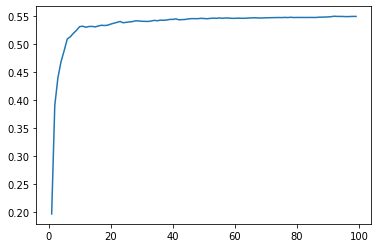

In [ ]:
plt.plot(rfr_tune_scores['Test Score'])
plt.show()

In [ ]:
rfr_tune_scores.sort_values(by = 'Test Score', ascending = False)

,Train Score,Test Score
92,0.937237,0.550161
98,0.937501,0.549865
93,0.93731,0.549855
99,0.937514,0.549827
94,0.937346,0.54979
...,...,...
5,0.896245,0.488118
4,0.884367,0.46855
3,0.865932,0.439814
2,0.826139,0.390433


## Bagging Regression

In [ ]:
BagReg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
BagReg.predict(X_test_processed)

array([ 691.30014,  852.5569 ,  915.8079 , ..., 3767.89536, 2026.6952 ,
       2335.49324])

In [ ]:
bag_est_depths = [estimator.get_depth() for estimator in BagReg.estimators_]
max(bag_est_depths)

36

In [ ]:
print(max(bag_est_depths))
print(min(bag_est_depths))

36
32


In [ ]:
model_score(BagReg)

,Score Type,Score
0,Training,0.914717
1,Testing,0.506359


### Bagging Regression Tuning using loops

In [ ]:
%%time

bag_n_list = []
for i in range(1, 100):
    bag_n_list.append(i)

estimators = bag_n_list

# Data frame to store the scores
Bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

# Iterate through the values to find the best number of estimators

for num_estimators in estimators:
  
   BagReg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
  
   BagReg.fit(X_train_processed, y_train)
  
   train_score = BagReg.score(X_train_processed, y_train)
   test_score = BagReg.score(X_test_processed, y_test)
  
   Bag_scores.loc[num_estimators, 'Train Score'] = train_score
   Bag_scores.loc[num_estimators, 'Test Score'] = test_score

CPU times: user 3min 50s, sys: 448 ms, total: 3min 50s
Wall time: 3min 51s


In [ ]:
Bag_scores.sort_values(by= 'Test Score', ascending = False)

,Train Score,Test Score
92,0.937293,0.552018
95,0.937408,0.55196
94,0.937414,0.551929
93,0.937366,0.55187
97,0.937453,0.551754
...,...,...
5,0.898364,0.49362
4,0.886274,0.471389
3,0.86852,0.437576
2,0.830461,0.389817


In [ ]:
bag_best = Bag_scores.index[1]
bag_best

2

In [ ]:
Bag_tuned = BaggingRegressor(n_estimators = bag_best)

Bag_tuned.fit(X_train_processed, y_train)

model_score(Bag_tuned)

,Score Type,Score
0,Training,0.812040
1,Testing,0.354131


## Decision Tree Regression

In [ ]:
DecTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
DecTreeReg.get_depth()

40

In [ ]:
DecTreeReg.get_n_leaves()

6261

In [ ]:
model_score(DecTreeReg)

,Score Type,Score
0,Training,1.000000
1,Testing,0.190494


### Decision Tree Regression Tuning using loops

In [ ]:
%%time

depths = range(1,38)

scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])

for depth in depths:

    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

    dec_tree.fit(X_train_processed, y_train)
    
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

scores.sort_values(by = 'Test Score', ascending = False)

CPU times: user 1.96 s, sys: 6.92 ms, total: 1.96 s
Wall time: 2.01 s


,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582408,0.615072
7,0.576843,0.626454
8,0.561208,0.642714
9,0.543812,0.663688
10,0.526835,0.683572
3,0.524222,0.524218
11,0.499619,0.708228
12,0.476198,0.733152


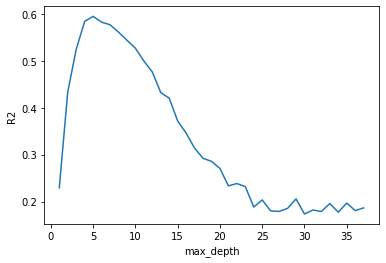

In [ ]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
best_score = scores.index[4]

Dec_tuneBest = DecisionTreeRegressor(max_depth = best_score, random_state= 42)

Dec_tuneBest.fit(X_train_processed, y_train)

Dec_tuneBest

DecisionTreeRegressor(max_depth=5, random_state=42)

# Display all model scores

In [ ]:
regression_metrics(rfr_tune)

,Metrics,Values
0,MAE,7.722028e+02
1,MSE,1.238737e+06
2,R2,5.510159e-01
3,RMSE,1.112986e+03


In [ ]:
regression_metrics(Bag_tuned)

,Metrics,Values
0,MAE,9.250002e+02
1,MSE,1.781937e+06
2,R2,3.541314e-01
3,RMSE,1.334892e+03


In [ ]:
regression_metrics(Dec_tuneBest)

,Metrics,Values
0,MAE,7.383173e+02
1,MSE,1.118186e+06
2,R2,5.947100e-01
3,RMSE,1.057443e+03
